### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

Evaluate the critical columns in the dataset

In [18]:
data[['destination', 'passanger', 'weather']].value_counts()

destination      passanger  weather
No Urgent Place  Friend(s)  Sunny      2894
Work             Alone      Sunny      2250
Home             Alone      Sunny      2245
No Urgent Place  Alone      Sunny       963
                 Kid(s)     Sunny       732
                 Partner    Sunny       653
Work             Alone      Snowy       489
                            Rainy       425
Home             Alone      Snowy       400
No Urgent Place  Friend(s)  Snowy       259
                 Alone      Rainy       209
Home             Partner    Sunny       202
                 Alone      Rainy       197
No Urgent Place  Friend(s)  Rainy       145
Home             Kid(s)     Sunny       130
No Urgent Place  Alone      Snowy       127
                 Partner    Rainy        99
                 Kid(s)     Rainy        78
                 Partner    Snowy        64
                 Kid(s)     Snowy        60
Home             Partner    Rainy        57
                 Kid(s)     Snowy       

In [10]:
data[['destination', 'passanger', 'weather']].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [19]:
data[['coupon', 'expiration', 'time']].value_counts()

coupon                 expiration  time
Coffee House           2h          7AM     591
                                   10AM    562
                       1d          6PM     549
                       2h          6PM     544
Carry out & Take away  1d          7AM     492
Bar                    1d          7AM     487
Restaurant(<20)        1d          2PM     472
                       2h          6PM     465
Coffee House           1d          2PM     434
Carry out & Take away  1d          10PM    404
Bar                    1d          10AM    378
                                   6PM     370
Carry out & Take away  2h          10AM    368
Coffee House           2h          2PM     360
Restaurant(<20)        1d          7AM     343
Coffee House           1d          10AM    337
                                   7AM     322
Restaurant(<20)        2h          10PM    321
Restaurant(20-50)      1d          6PM     307
                                   7AM     291
Restaurant(<20)     

In [20]:
data[['gender', 'age', 'maritalStatus']].value_counts()

gender  age      maritalStatus    
Male    21       Single               1026
        26       Single                750
Female  31       Married partner       599
Male    31       Married partner       527
Female  50plus   Married partner       480
        41       Married partner       463
        21       Single                462
        26       Single                458
Male    26       Married partner       429
Female  21       Unmarried partner     416
Male    50plus   Married partner       401
Female  26       Married partner       394
Male    36       Married partner       388
Female  21       Married partner       375
        36       Married partner       352
        50plus   Single                350
        26       Unmarried partner     324
Male    21       Unmarried partner     308
        31       Single                307
        41       Married partner       268
Female  31       Single                262
Male    below21  Single                262
Female  31       Un

In [22]:
data[['has_children', 'education', 'occupation']].value_counts()

has_children  education                               occupation                              
0             Some college - no degree                Student                                     838
              Bachelors degree                        Unemployed                                  381
                                                      Student                                     330
              Some college - no degree                Sales & Related                             330
1             Bachelors degree                        Computer & Mathematical                     314
                                                                                                 ... 
              High School Graduate                    Management                                   21
0             High School Graduate                    Arts Design Entertainment Sports & Media     20
                                                      Retired                            

In [23]:
data[['income', 'car']].value_counts()

income           car                                     
$12500 - $24999  Scooter and motorcycle                      22
$87500 - $99999  Mazda5                                      22
                 do not drive                                22
$100000 or More  crossover                                   21
$37500 - $49999  Car that is too old to install Onstar :D    21
dtype: int64

In [26]:
data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [27]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [28]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [30]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [31]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [32]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

Based on the analysis of the data, car column is not useful and it is also imcomplete. Will drop this column. Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20to50 has Na and needs clean up.

In [40]:

clean_data = data.drop(columns = 'car')
clean_data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']]= data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].fillna('never')
clean_data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [46]:
accept_num = clean_data[clean_data['Y'] == 1]['Y'].sum()

In [51]:
accept_proportion = accept_num / clean_data.shape[0]
print(accept_proportion)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:xlabel='coupon', ylabel='count'>

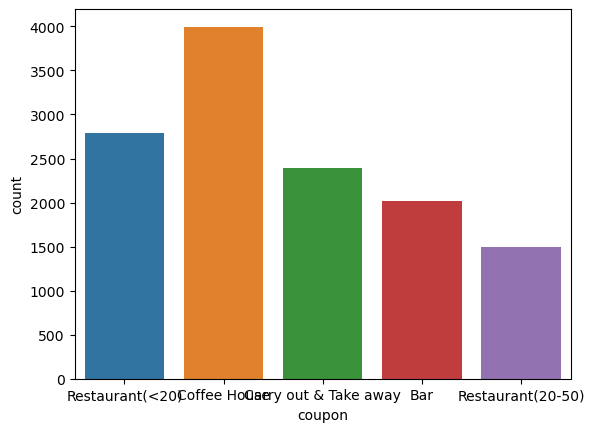

In [54]:
sns.countplot(data=clean_data, x='coupon')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

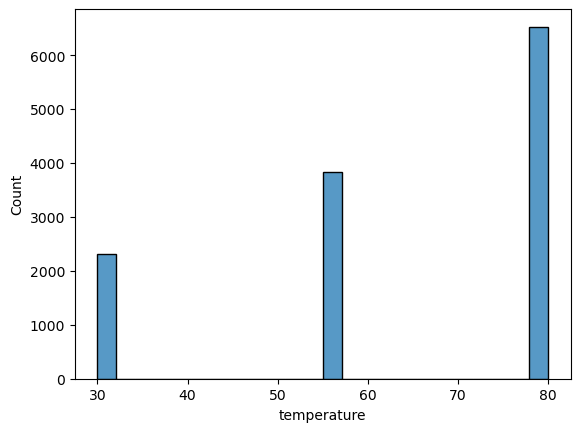

In [55]:
sns.histplot(data=clean_data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [56]:
df = clean_data[clean_data['coupon'] == 'Bar']
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [59]:
bar_accept_num = df[df['Y'] == 1]['Y'].sum()
print(bar_accept_num)

827


In [60]:
bar_accept_proportion = bar_accept_num / df.shape[0]
print(bar_accept_proportion)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [61]:
df['Bar'].value_counts()

never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [69]:
never_y = len(df[(df['Bar'] == 'never') & (df['Y'] == 1)])
less1_y = len(df[(df['Bar'] == 'less1') & (df['Y'] == 1)])
one_three_y = len(df[(df['Bar'] == '1~3') & (df['Y'] == 1)])
four_eight_y = len(df[(df['Bar'] == '4~8') & (df['Y'] == 1)])
gt8_y = len(df[(df['Bar'] == 'gt8') & (df['Y'] == 1)])

In [73]:
less3_rate = (never_y + less1_y + one_three_y) / (851 + 570 + 397)
print(less3_rate)
gt3_rate = (four_eight_y + gt8_y) / (150 + 49)
print(gt3_rate)

0.37073707370737075
0.7688442211055276


The acceptance rate of going to a bar 3 or fewer times is much less than those who goes more.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [79]:
one_three_25_y = len(df[(df['Bar'] == '1~3') & (df['Y'] == 1) & ~((df['age'] == 'below21') | (df['age'] == '21'))])
four_eight_25_y = len(df[(df['Bar'] == '4~8') & (df['Y'] == 1) & ~((df['age'] == 'below21') | (df['age'] == '21'))])
gt8_25_y = len(df[(df['Bar'] == 'gt8') & (df['Y'] == 1) & ~((df['age'] == 'below21') | (df['age'] == '21'))])
one_25_total = len(df[(df['Bar'] == '1~3') | (df['Bar'] == '4~8') | (df['Bar'] == 'gt8') & ~((df['age'] == 'below21') | (df['age'] == '21'))])
print(one_25_total)

577


In [81]:
one_25_rate = (one_three_25_y + four_eight_25_y + gt8_25_y) / one_25_total
print(one_25_rate)

0.5060658578856152


In [82]:
other_rate = (bar_accept_num - (one_three_25_y + four_eight_25_y + gt8_25_y)) / (df.shape[0] - one_25_total)
print(other_rate)

0.3715277777777778


<BarContainer object of 2 artists>

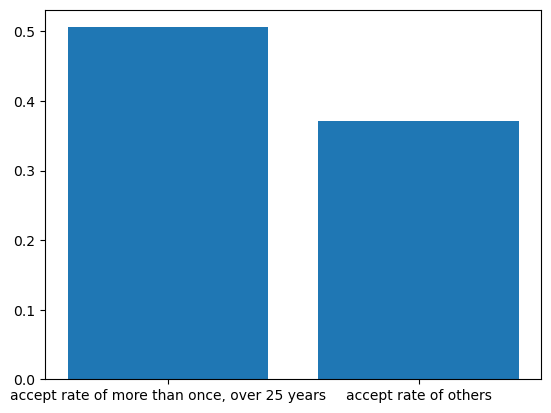

In [86]:
plt.bar(x = ['accept rate of more than once, over 25 years', 'accept rate of others'], height = [one_25_rate, other_rate])

acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is about 50.61%, higher than the rate of others with 37.15%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [95]:
one_nokid_total = len(df[~((df['Bar'] == 'never') & (df['Bar'] == 'less1')) & ~(df['passanger'] == 'Kid(s)') & ~(df['occupation'] == 'Farming Fishing & Forestry')])
print(one_nokid_total)
one_nokid_y = len(df[~((df['Bar'] == 'never') & (df['Bar'] == 'less1')) & ~(df['passanger'] == 'Kid(s)') & ~(df['occupation'] == 'Farming Fishing & Forestry') & (df['Y']==1)])
print(one_nokid_y)

1805
781


In [98]:
one_nokid_rate = one_nokid_y / one_nokid_total
print(one_nokid_rate)
other_rate2 = (bar_accept_num - one_nokid_y) / (df.shape[0] - one_nokid_total)
print(other_rate2)

0.4326869806094183
0.2169811320754717


<BarContainer object of 2 artists>

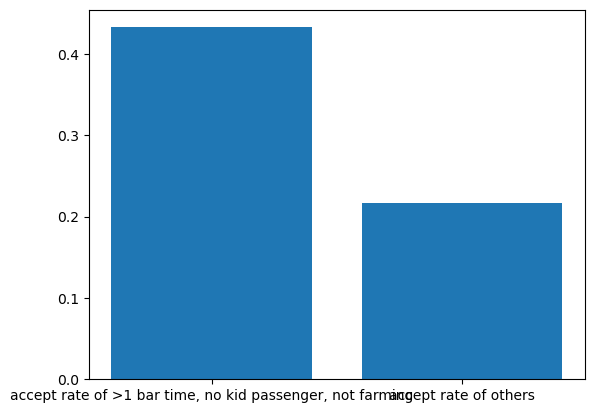

In [99]:
plt.bar(x = ['accept rate of >1 bar time, no kid passenger, not farming', 'accept rate of others'], height = [one_nokid_rate, other_rate2])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [109]:
one_nokid_nowidow_total = len(df[~((df['Bar'] == 'never') & (df['Bar'] == 'less1')) & ~(df['passanger'] == 'Kid(s)') & ~(df['maritalStatus'] == 'Widowed')])
one_nokid_nowidow_y = len(df[~((df['Bar'] == 'never') & (df['Bar'] == 'less1')) & ~(df['passanger'] == 'Kid(s)') & ~(df['maritalStatus'] == 'Widowed') & (df['Y']==1)])
one_nokid_nowidow_rate = one_nokid_nowidow_y / one_nokid_nowidow_total
print(one_nokid_nowidow_rate)

one_less30_total = len(df[~((df['Bar'] == 'never') & (df['Bar'] == 'less1')) & ((df['age'] == 'below21') | (df['age'] == '21') | (df['age'] == '26'))])
one_less30_y = len(df[~((df['Bar'] == 'never') & (df['Bar'] == 'less1')) & ((df['age'] == 'below21') | (df['age'] == '21') | (df['age'] == '26')) &(df['Y']==1)])
one_less30_rate = one_less30_y / one_less30_total
print(one_less30_rate)

gt4_gt50k_total = len(df[((df['RestaurantLessThan20'] == '4~8') | (df['RestaurantLessThan20'] == 'gt8')) & ((df['income'] == '$12500 - $24999') | (df['income'] == '$100000 or More'))])
gt4_gt50k_y = len(df[((df['RestaurantLessThan20'] == '4~8') | (df['RestaurantLessThan20'] == 'gt8')) & ((df['income'] == '$12500 - $24999') | (df['income'] == '$100000 or More')) & (df['Y']==1)])
gt4_gt50k_rate = gt4_gt50k_y / gt4_gt50k_total
print(gt4_gt50k_rate)


0.4340782122905028
0.489432703003337
0.4457831325301205


<BarContainer object of 3 artists>

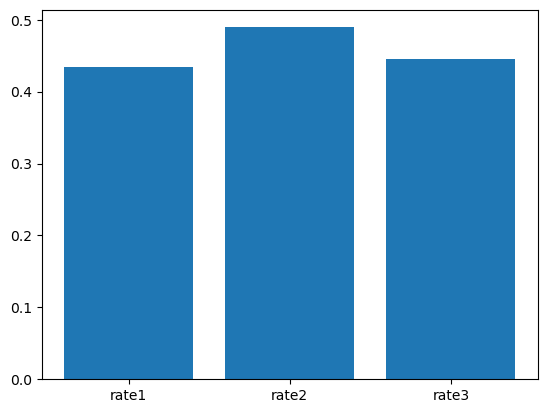

In [111]:
plt.bar(x=['rate1', 'rate2', 'rate3'], height = [one_nokid_nowidow_rate, one_less30_rate, gt4_gt50k_rate])

The accept rate for the three cases are 43.4%, 48.9%, 44.6%, seems not too much differences.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, the dirvers went to bars more often, has no kids as passenger, older than 25 are more likely to accept the bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [119]:
df2 = clean_data[clean_data['coupon'] == 'Coffee House']
df2 = df2.drop(columns = ['CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Bar', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'weather', 'temperature', 'time', 'coupon'])
df2

,destination,passanger,expiration,gender,age,maritalStatus,has_children,education,occupation,income,CoffeeHouse,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,0,1,0
3,No Urgent Place,Friend(s),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,0,1,0
4,No Urgent Place,Friend(s),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,0,1,0
12,No Urgent Place,Kid(s),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,0,1,1
15,Home,Alone,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,never,0,1,0
12659,Work,Alone,1d,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,never,1,0,0
12674,Home,Alone,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,1,0,0
12675,Home,Alone,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,0,1,0


In [161]:
age_list = df2['age'].value_counts().sort_index().index.tolist()
print(age_list)

['21', '26', '31', '36', '41', '46', '50plus', 'below21']


In [159]:
df2[df2['Y'] == 1]['age'].value_counts().sort_index()

21         463
26         434
31         297
36         188
41         163
46         113
50plus     229
below21    108
Name: age, dtype: int64

In [162]:

coffee_age_rate = []
for idx in range(8):
    age_total = (df2['age'].value_counts().sort_index()[idx])
    age_y = (df2[df2['Y'] == 1]['age'].value_counts().sort_index()[idx])
    coffee_age_rate.append(age_y/age_total)
print(coffee_age_rate)
    

[0.5243488108720272, 0.5148279952550415, 0.4767255216693419, 0.46766169154228854, 0.5015384615384615, 0.5136363636363637, 0.42018348623853213, 0.6967741935483871]


<BarContainer object of 8 artists>

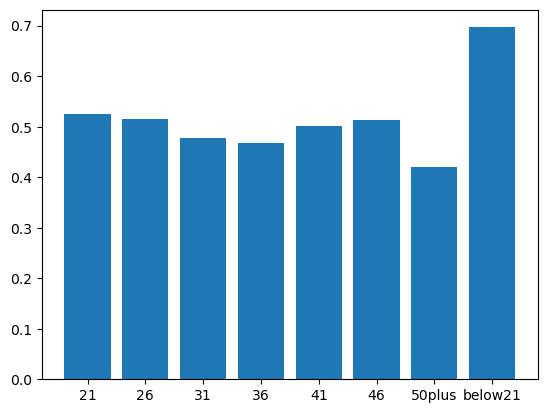

In [163]:
plt.bar(x=age_list, height=coffee_age_rate)

In [164]:
df2['passanger'].value_counts().sort_index()

Alone        2256
Friend(s)    1228
Kid(s)        207
Partner       305
Name: passanger, dtype: int64

In [165]:
passanger_list = df2['passanger'].value_counts().sort_index().index.tolist()

In [167]:
coffee_passanger_rate = []
for idx in range(4):
    passanger_total = (df2['passanger'].value_counts().sort_index()[idx])
    passanger_y = (df2[df2['Y'] == 1]['passanger'].value_counts().sort_index()[idx])
    coffee_passanger_rate.append(passanger_y/passanger_total)
print(coffee_passanger_rate)

[0.4379432624113475, 0.5969055374592834, 0.4830917874396135, 0.5704918032786885]


<BarContainer object of 4 artists>

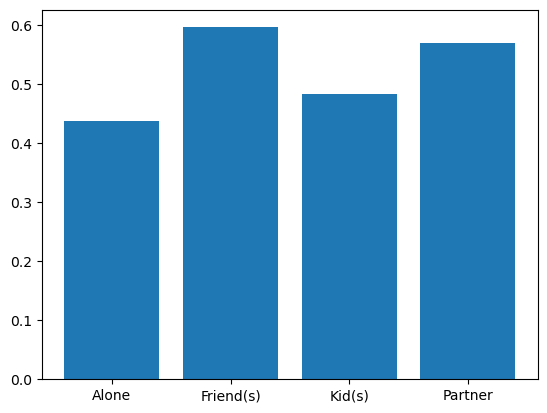

In [168]:
plt.bar(x=passanger_list, height=coffee_passanger_rate)

In [169]:
df2['income'].value_counts().sort_index()

$100000 or More     534
$12500 - $24999     594
$25000 - $37499     640
$37500 - $49999     590
$50000 - $62499     548
$62500 - $74999     275
$75000 - $87499     236
$87500 - $99999     271
Less than $12500    308
Name: income, dtype: int64

In [170]:
income_list = df2['income'].value_counts().sort_index().index.tolist()

In [172]:
coffee_income_rate = []
for idx in range(9):
    income_total = (df2['income'].value_counts().sort_index()[idx])
    income_y = (df2[df2['Y'] == 1]['income'].value_counts().sort_index()[idx])
    coffee_income_rate.append(income_y/income_total)
print(coffee_income_rate)

[0.4943820224719101, 0.5404040404040404, 0.4734375, 0.5423728813559322, 0.5036496350364964, 0.43636363636363634, 0.2966101694915254, 0.5571955719557196, 0.551948051948052]


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

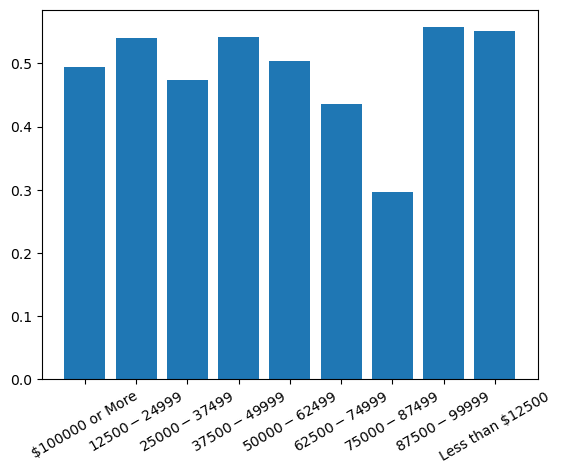

In [175]:
plt.bar(x=income_list, height=coffee_income_rate)
plt. xticks(rotation=30) 

In [158]:
df2[df2['Y']==1]['CoffeeHouse'].value_counts().sort_index()

1~3      675
4~8      369
gt8      225
less1    518
never    208
Name: CoffeeHouse, dtype: int64

In [178]:
house_list = df2['CoffeeHouse'].value_counts().sort_index().index.tolist()
house_list

['1~3', '4~8', 'gt8', 'less1', 'never']

In [176]:
coffee_house_rate = []
for idx in range(5):
    house_total = (df2['CoffeeHouse'].value_counts().sort_index()[idx])
    house_y = (df2[df2['Y'] == 1]['CoffeeHouse'].value_counts().sort_index()[idx])
    coffee_house_rate.append(house_y/house_total)
print(coffee_house_rate)

[0.6477927063339731, 0.6858736059479554, 0.6578947368421053, 0.48186046511627906, 0.2082082082082082]


<BarContainer object of 5 artists>

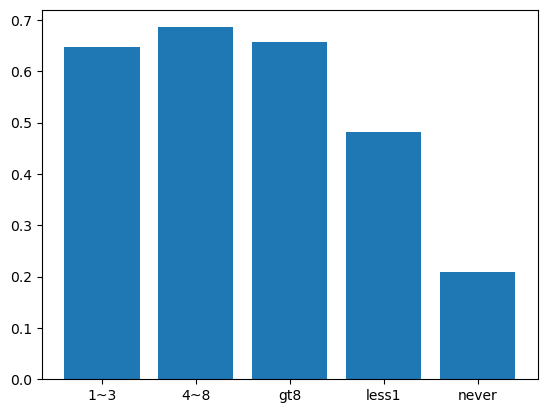

In [179]:
plt.bar(x=house_list, height=coffee_house_rate)

Based on the observation, the drivers who went to cofferhouse more frequently in the past, age below 21, less in income, drive with a friend are more likely to accept the coupon.